<a href="https://colab.research.google.com/github/rahulin05/EIP-4/blob/master/Copy_of_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


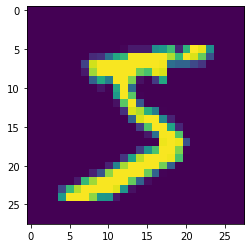

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [72]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# Image size 26
model.add(Convolution2D(64, 3, 3, activation='relu'))
# 24
model.add(Convolution2D(64, 3, 3, activation='relu'))
#22
model.add(Convolution2D(64, 3, 3, activation='relu'))
#20
model.add(MaxPooling2D(pool_size=(2, 2)))
#10
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))

#model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/loca

In [73]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 20, 20, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 6, 6, 64)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [75]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 16s 262us/step - loss: 0.1493 - acc: 0.9533
Epoch 2/20
60000/60000 [==============================] - 15s 245us/step - loss: 0.0475 - acc: 0.9856
Epoch 3/20
60000/60000 [==============================] - 15s 243us/step - loss: 0.0361 - acc: 0.9893
Epoch 4/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.0297 - acc: 0.9909
Epoch 5/20
60000/60000 [==============================] - 15s 245us/step - loss: 0.0230 - acc: 0.9926
Epoch 6/20
60000/60000 [==============================] - 15s 243us/step - loss: 0.0182 - acc: 0.9942
Epoch 7/20
60000/60000 [==============================] - 15s 243us/step - loss: 0.0170 - acc: 0.9948
Epoch 8/20
60000/60000 [==============================] - 15s 243us/step - loss: 0.0143 - acc: 0.9952
Epoch 9/20
60000/60000 [==============================] - 15s 242us/step - loss: 0.0123 - acc: 0.9959
Epoch 10/20
60000/60000 [==============================] - 15s 243us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [77]:
print(score)

[0.04574567803920377, 0.9918]


In [0]:
y_pred = model.predict(X_test)

In [79]:
print(y_pred[:9])
print(y_test[:9])

[[6.1587311e-23 3.5127010e-16 1.6866515e-11 2.7949188e-12 4.5844285e-18
  6.5783265e-17 5.1183824e-24 1.0000000e+00 1.5450142e-20 3.9000319e-15]
 [8.0413378e-21 1.6324880e-14 1.0000000e+00 1.4079179e-18 4.6679828e-20
  4.5116225e-22 1.0846210e-14 6.7685708e-20 1.2237502e-14 6.7701942e-21]
 [1.4650637e-19 1.0000000e+00 5.2736773e-14 3.9983522e-17 2.6263990e-16
  8.2956144e-14 1.9462426e-16 3.3370884e-12 4.3132548e-15 1.9485863e-20]
 [1.0000000e+00 2.1621579e-15 2.1022348e-13 1.5605716e-13 5.7546906e-15
  4.3312459e-10 2.1113720e-10 8.1306760e-11 8.8076197e-15 1.2389137e-12]
 [1.0530231e-17 2.3107166e-17 1.3155423e-17 1.8305246e-23 1.0000000e+00
  2.8372225e-19 2.6617791e-18 5.0868232e-19 1.5886777e-15 1.7454611e-14]
 [2.3448274e-21 1.0000000e+00 1.9443301e-14 2.3934760e-20 3.1117942e-17
  1.6507917e-15 1.4735111e-18 7.8694890e-13 1.8730955e-18 6.2135057e-22]
 [3.2018259e-26 9.3215366e-13 4.8528275e-18 3.4325496e-22 1.0000000e+00
  8.8822737e-18 3.7818569e-23 8.1456819e-16 1.3174118e-15 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

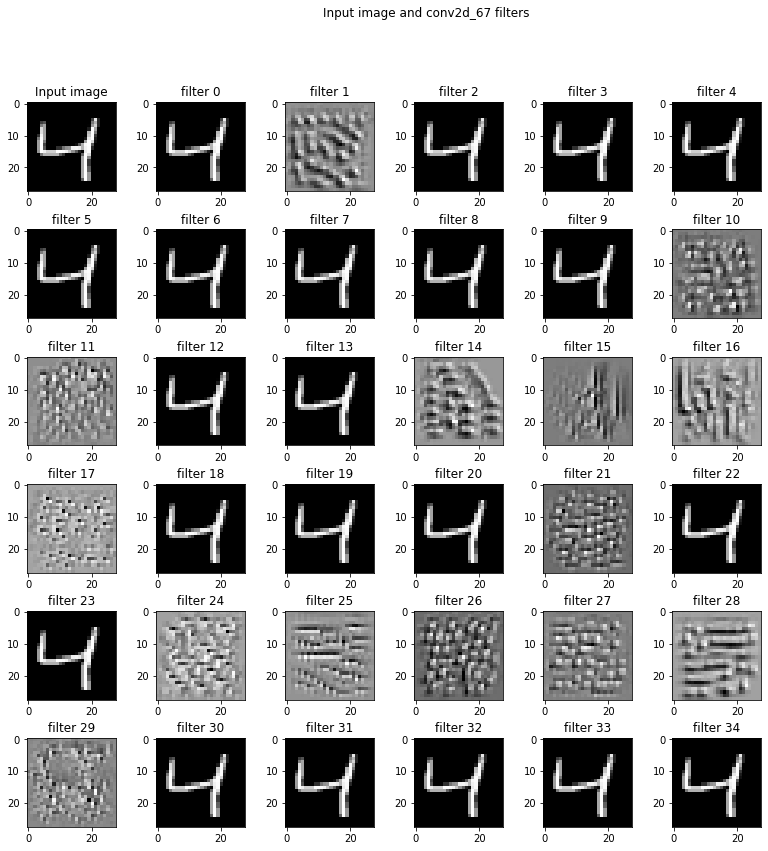

In [82]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_67'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()